# Dolar/Türk lirası verilerini kullanarak kuru tahmin etme 
**Bu projenin amacı 2002-2020 USD/TRY kurunu kullanarak veri analizi ve tahmin yürütmedir**

verinin kaynağı : tr.investing.com



* Orkun Şaylığ


* Semih Enser


* Muhammet Fatih Balıkçı





In [0]:
h

In [1]:
! pip install mpl_finance #mum grafiğini oluşturmak için kullanacağımız kütüphaneyi yüklüyoruz

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime #verideki tarihin istediğimiz formata getirebilmek için kullanacağımız kütüphane
import matplotlib.dates as mdate # tarihi sayısal değerlere dönüştürmek için kullanacağımız kütüphane 
import seaborn as sns
from mpl_finance import candlestick_ohlc # ihtiyacımız olan mum (candlestick) grafiğini yapabilmemiz için gerekli olan kütüphane
import numpy as np
print("kütüphaneler yüklendi")


kütüphaneler yüklendi


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ilk önce verimizi yüklüyoruz

In [3]:
veri = pd.read_csv('https://raw.githubusercontent.com/orkunsaylig/USDTRYtahmin/master/2002-2020.csv') #verimizi yüklüyoruz
veri = veri.loc[::-1] #veri son günden ilk güne doğru sıralandığı için veriyi ters çeviriyoruz.
veri = veri.reset_index()
veri = veri[['Tarih','Açılış','Yüksek','Düşük','Şimdi']]#şimdilik bu 5 veriye ihtiyacımız var
print("veri yüklendi")



veri yüklendi


verimizde 4 farklı değer var. Bunlar : Açılış, Yüksek, Düşük ve Şimdi olarak adlandırılmış. Bunların anlamlarına bir bakalım

Açılış: Borsanın o günkü açılış fiyatı.

Yüksek: gün içinde ulaşılan en yüksek fiyat.

Düşük: gün içinde ulaşılan en düşük fiyat.

Şimdi: borsanın kapandığı andaki fiyatı. Kapanış fiyatı aynı zamanda bir sonraki günün Açılış fiyatı olur.

In [4]:
veri.head()

,Tarih,Açılış,Yüksek,Düşük,Şimdi
0,02.01.2002,1.452,1.4680,1.400,1.4480
1,03.01.2002,1.441,1.4530,1.385,1.4200
2,04.01.2002,1.417,1.4270,1.365,1.4140
3,07.01.2002,1.411,1.4260,1.385,1.4000
4,08.01.2002,1.390,1.4105,1.370,1.3945


matplotlib'le mum grafiğimizi oluşturabilmek için verideki tarih bilgisini istenen formata dönüştürüyoruz

In [0]:
tarih = []
for takvim in veri['Tarih']:
  takvim = datetime.strptime(takvim, '%d.%m.%Y').strftime('%m.%d.%y')
  tarih.append(takvim)

  
veri['Tarih'] = tarih


In [22]:
help(datetime.strptime)
help(datetime.strftime)

Help on built-in function strptime:

strptime(...) method of builtins.type instance
    string, format -> new datetime parsed from a string (like time.strptime()).

Help on method_descriptor:

strftime(...)
    format -> strftime() style string.



# Kolerasyon

Şimdi kolonların Kolerasyonuna bir  bakalım.

Buna göre bütün değerler birbirleriyle doğrusal bir ilişki içinde

![alt text](https://lh3.googleusercontent.com/proxy/vLoSqbeTI011IWFlcfg2EhVAvX_3_dVirvvxBcVGRIZzPIFm4XtVYM4FvWsDwTbPrhkPjz-GTxx5y_zs82akLHaiZo3KHgxhtyfiUliUd3giRT_-K8S-nF1xShDjWIp7qgkdcOI)


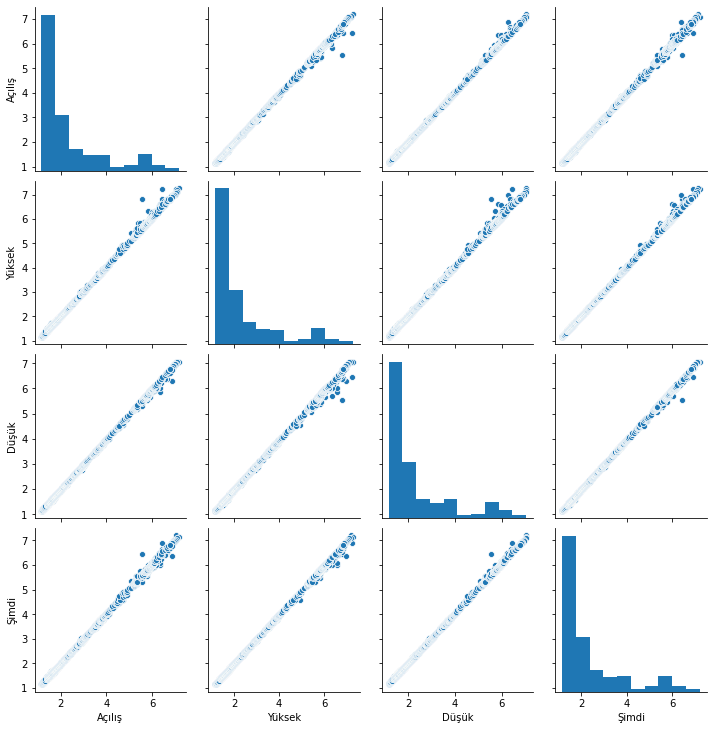

In [6]:
sns.pairplot(veri);

# Mum Grafiği (Candlestick chart) nasıl okunur, ne anlama gelir ?
normal bir çizgi grafiğine göre mum grafiği bize aynı anda 5 farklı veriyi görmemizi sağlar.
![alt text](https://therobusttrader.com/wp-content/uploads/img_5d3b7947deecd.png)
Mumun gövdesi, belirlediğiniz süre zarfında size bazı temel şeyleri söyleyebilir:
Açılış fiyatı,
Kapanış fiyatı,
Hisse fiyatının yönü,(yukarı ya da aşağı)

Yeşil bir mum çubuğu, borsa kapanış fiyatının açılış fiyatından yüksek olduğunu size bildirir. Öte yandan, kırmızı mumlar kapanış fiyatının açılış fiyatından düşük olduğunu göstermektedir.


kutunun altında ve üstünde bulunan çubuklar ise belirlediğiniz süre zarfında size en yüksek ve en düşük seviyeyi gösterirler.

şimdi ise tarih verimizi matplotlib.dates kütüphanesi ile sayısal forma dönüştürüyoruz.
Grafiği oluşturmak için tarihin sayısal bir şekilde olması şart.

In [0]:
veri['Tarih'] = veri['Tarih'].map(mdate.datestr2num)

**Artık mum grafiğimizi oluşturabiliriz**

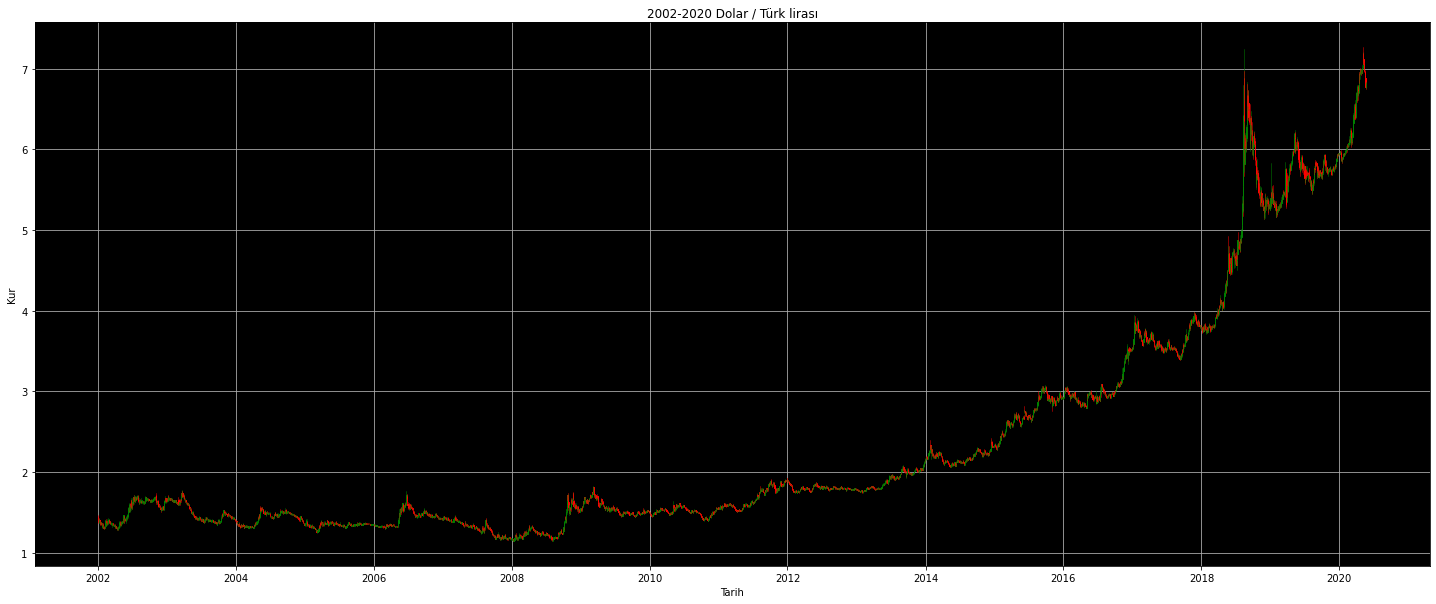

In [8]:
fig , ax = plt.subplots(figsize = (25,10))
ax.xaxis_date()
ax.set_title('2002-2020 Dolar / Türk lirası')
ax.set_ylabel('Kur')
ax.set_xlabel('Tarih')
ax.set_facecolor('black')
ax.grid(True)
candlestick_ohlc(ax,veri.values,width=0.8,colorup='g',colordown='r',alpha = 1)
plt.show()

doların 2002-2020 yılındaki grafiğini çizdirelim

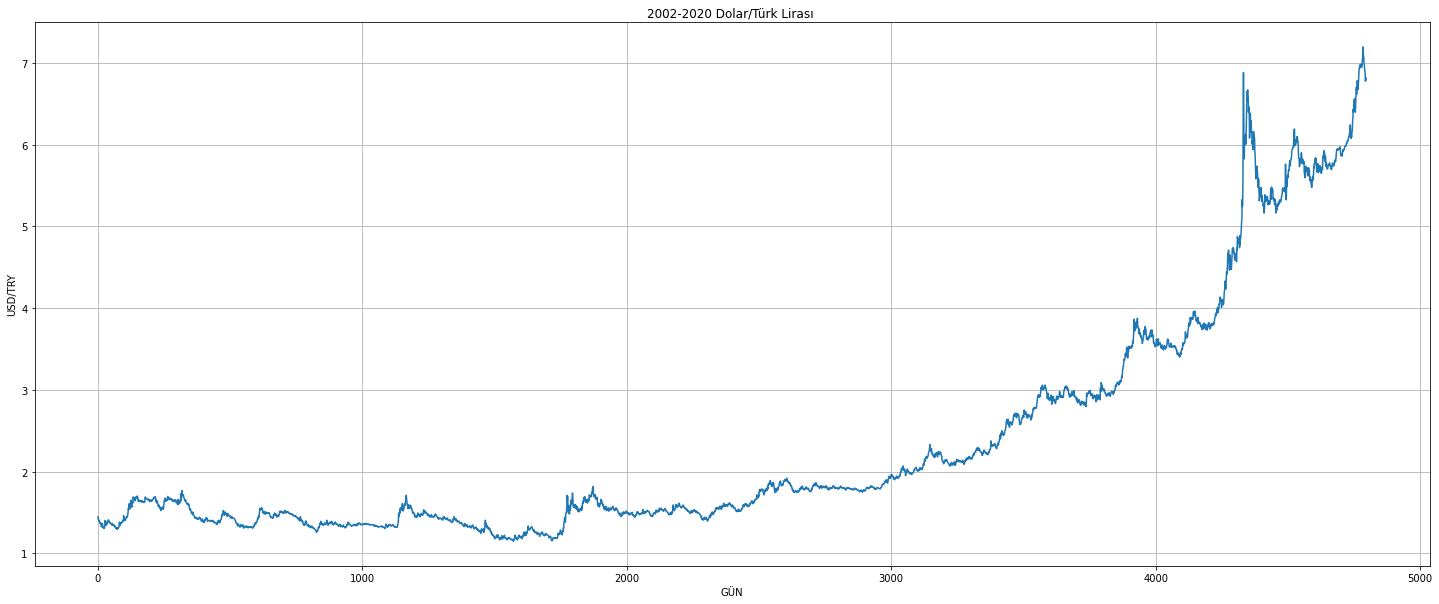

In [9]:
plt.figure(figsize=(25,10))
plt.plot(veri['Şimdi'])
plt.title('2002-2020 Dolar/Türk Lirası ')
plt.ylabel('USD/TRY')
plt.xlabel('GÜN')
plt.grid()
plt.show()

**Tahmin işlemlerinde son 20 günü kullandık.**

Şimdide o 20 günün mum grafiğini inceleyelim.

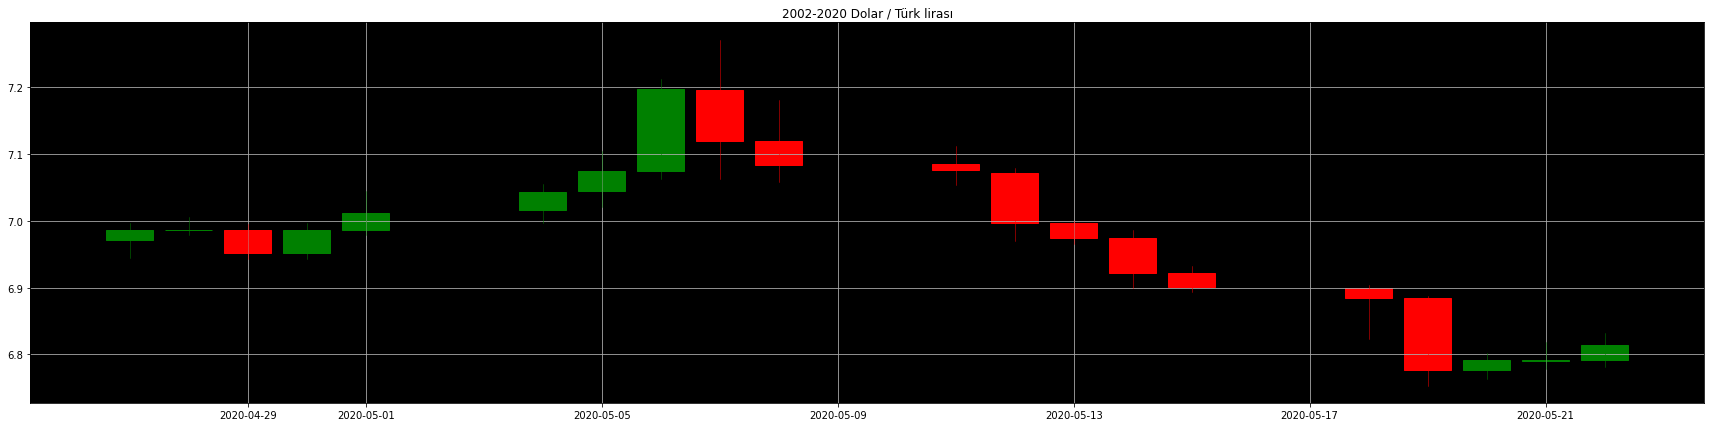

In [10]:
fig , ax = plt.subplots(figsize = (30,7))
ax.xaxis_date()
ax.set_title('2002-2020 Dolar / Türk lirası')
ax.set_facecolor('black')
ax.grid(True)
candlestick_ohlc(ax,veri[-20:].values,width=0.8,colorup='g',colordown='r',alpha = 1)
plt.show()

**Aradaki zaman boşlukları Hafta sonundan kaynaklanmaktadır**





# Tahmin

**basit doğrusal Regresyon nedir ?**

basit doğrusal (lineer) regresyon 2 farklı verinin arasındaki ilişikiyi özetleyen bir metotdur.

Regresyon aynı zamanda değişkenler arasındaki doğrusal ilişki fonksiyonunu bulmakla kalmaz, değişkenlerden birinin değeri bilindiğinde diğer değişken hakkında bir tahmin yürütmesinide sağlar

**gerekli Lineer Regresyon kütüphanemizi yükleyelim**

In [0]:
from sklearn.linear_model import LinearRegression


**Modelimizi eğitmek için 17 yıllık veriyi kullandık**

**Son 21 günü ise test verisi olarak kullandık**


In [0]:
X_train = veri[['Açılış']]
X_train = X_train[:-21] # Eğitim X ekseni

X_test = veri[['Açılış']]
X_test = X_test[-21:] #test verisi X ekseni

y_train = veri[['Şimdi','Yüksek','Düşük']] 
y_train = y_train[:-21] # Eğitim Y ekseni

y_test = veri[['Şimdi','Yüksek','Düşük']]
y_test = y_test[-21:] # test verisi Y ekseni


Şimdi modelimizi eğitip kalan 21 gün için bir tahmin üretelim

In [13]:
lr = LinearRegression()
lr.fit (X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
tahmin = lr.predict(X_test)
tahmin = pd.DataFrame(tahmin)

y_test değişkeni gerçek kur değerleri

tahmin ise tahmin edilen kur değerleri

In [0]:
y_test =y_test.reset_index()
y_test = y_test[['Şimdi']]

**modelimizi 17 yılın verisini kullanarak eğittik **


 Grafiğini çizdirelim 

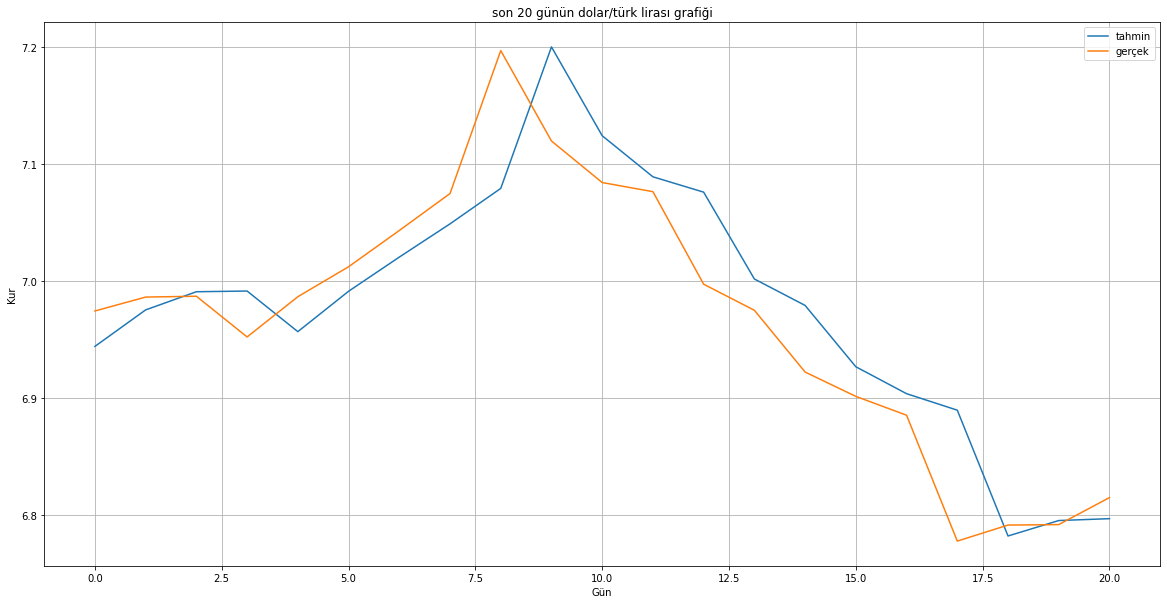

In [16]:
plt.figure(figsize =(20,10))
plt.plot(tahmin[0])
plt.plot(y_test)
plt.title('son 20 günün dolar/türk lirası grafiği')
plt.xlabel('Gün')
plt.ylabel('Kur')
plt.grid()
plt.legend(['tahmin','gerçek'],loc = 'best')

**Gördüğünüz gibi tahmin gerçek değerden bir gün geride geliyor**

İşimiz daha bitmedi.

tahmin verisinin gerçek veriye ulaşması için yapmamız gereken tek şey tahminin son gününü alıp yeni bir tahmin üretmek.

böylelikle tahmin, gerçek veriyle aynı güne ulaşıcak.



In [17]:
yarin = pd.DataFrame(tahmin[-1:][0])
yarin = yarin.reset_index()
yarin = yarin[[0]]
yarin

,0
0,6.796666


son bir kez daha tahmin yürütelim.

In [0]:
yeni_tahmin = lr.predict(yarin)
yeni_tahmin = pd.DataFrame(yeni_tahmin)

# Sonuç

In [19]:
print('USD/TRY yarın ki olası değeri : ',yeni_tahmin.iloc[0][0])

USD/TRY yarın ki olası değeri :  6.80103454263379


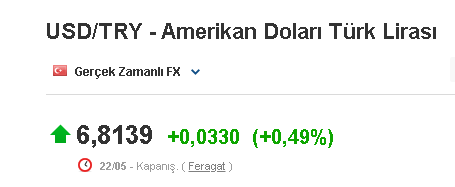

bu programı yazarkenki 22 mayıs günü dolar 6.8139 idi.

tahmine göre bu pazartesi günü doların 1 kuruş düşme ihtimalı bulunuyor.



**Ancak unutulmamalıdır ki hata payı oldukça yüksektir**


Bunun bir çok nedeni var 



*   Borsanın sadece geçmiş verilerle ilişkisi yoktur. Borsa 
Global Ekonomi'deki herhangi bir gelismeden,  tüm ülke ekonomilerini az veya çok  etkileyen olaylardan (örn. COVİD-19) ve o ülkede yaşanan yerel olaylardan etkilenir.

*   verinin kolerasyon grafiğinde de gördüğünüz gibi Açılış değerleriyle Kapanış değerleri arasındaki doğrusal ilişki tahmin yürütürken sorunlar çıkarıcaktır. Çünkü iki değerde zaman içinde sürekli yükselmektedir. Eğer modelimize bize 100 günlük bir tahmin vermesini isteseydik bu aynı  y = x grafiği gibi çıkardı.

*   Hatalı tahmin üzerine tahmin yürütmek. Yukarda saydığımız nedenlerden ilk yapılan tahminin hata payı vardır. Hata payı bulunan bir tahmin üzerinden tekrar tahmin yürütmek hata olasılığını 2'ye katlamaktadır.


**Kaynaklar**



*   https://tr.wikipedia.org/wiki/Regresyon_analizi

*   https://matplotlib.org/api/finance_api.html

*   https://matplotlib.org/3.1.1/api/dates_api.html

*   https://towardsdatascience.com/stock-prediction-in-python-b66555171a2

*   https://tr.investing.com/currencies/usd-try-historical-data

